In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [48]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [49]:
# Case 1: Prediction in RGB Color Space

In [50]:
# Model initializing
model = models.Sequential()

In [51]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [52]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

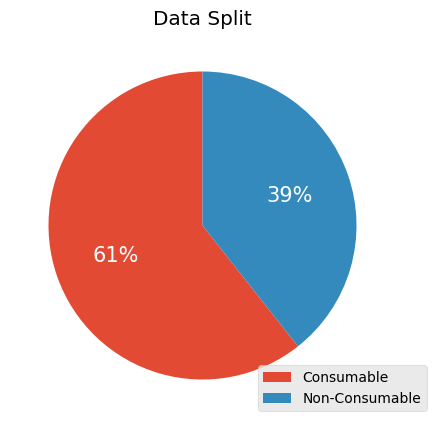

In [53]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [54]:
width = 100
height = 100

In [55]:
# Converting BGR Images to RGB Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 29.65104


In [56]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(310, 100, 100, 3)

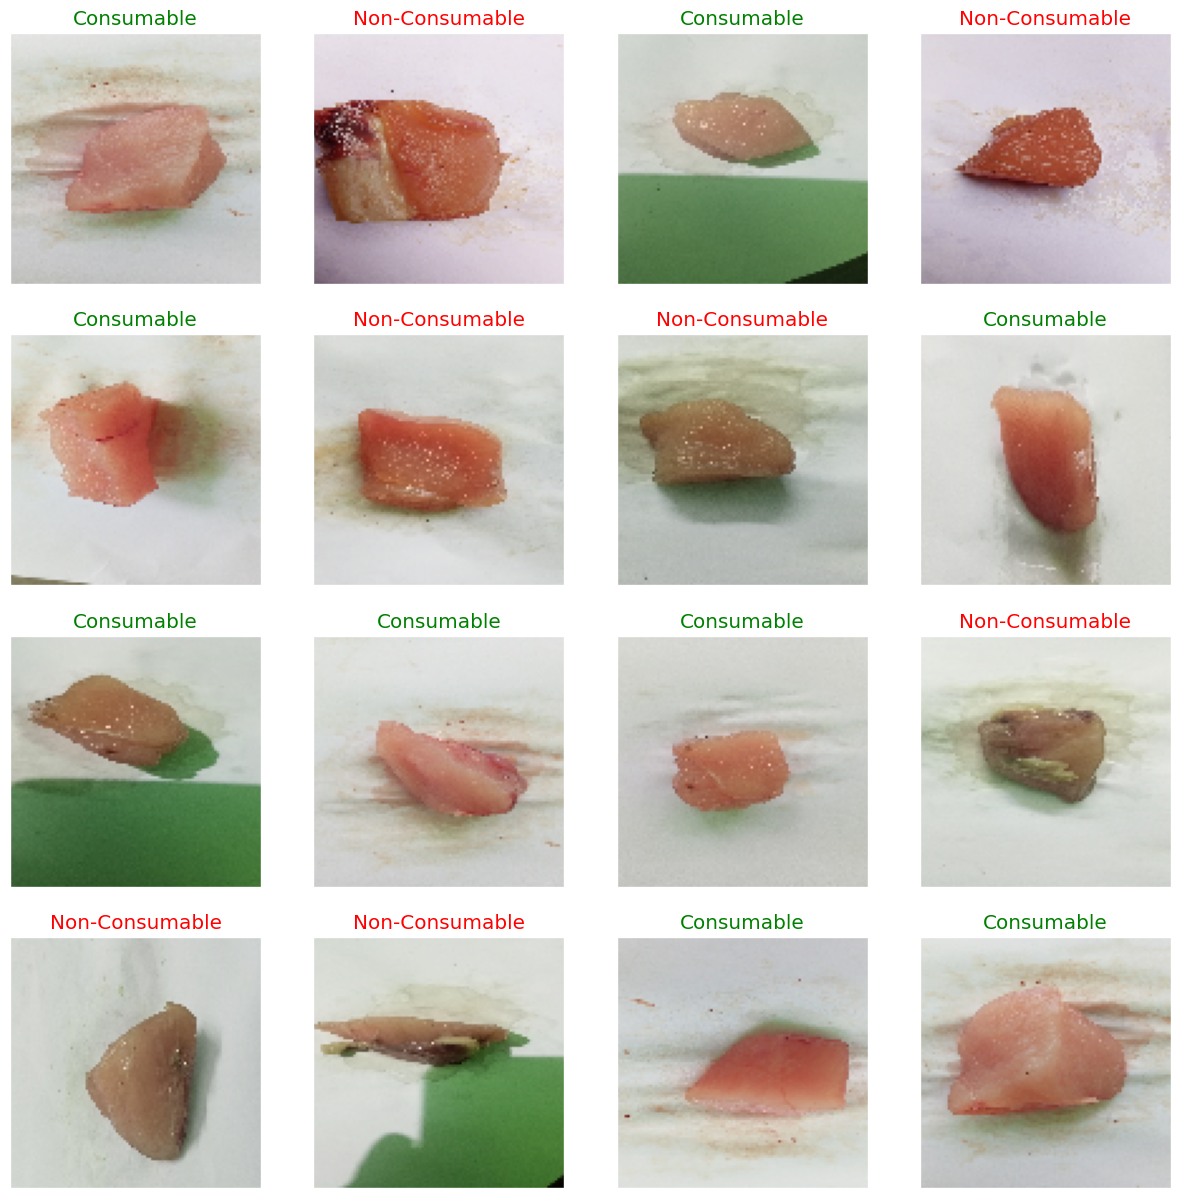

In [57]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [58]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [59]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 255.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [60]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [61]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 [==============================] - 4s 431ms/step - loss: 0.8698 - accuracy: 0.5300 - val_loss: 0.6755 - val_accuracy: 0.6022
Epoch 2/10
7/7 [==============================] - 2s 305ms/step - loss: 0.6824 - accuracy: 0.6083 - val_loss: 0.6710 - val_accuracy: 0.6022
Epoch 3/10
7/7 [==============================] - 2s 295ms/step - loss: 0.6660 - accuracy: 0.6083 - val_loss: 0.6588 - val_accuracy: 0.6022
Epoch 4/10
7/7 [==============================] - 2s 268ms/step - loss: 0.6512 - accuracy: 0.6083 - val_loss: 0.6364 - val_accuracy: 0.6022
Epoch 5/10
7/7 [==============================] - 2s 260ms/step - loss: 0.6240 - accuracy: 0.6774 - val_loss: 0.5836 - val_accuracy: 0.6129
Epoch 6/10
7/7 [==============================] - 2s 260ms/step - loss: 0.5871 - accuracy: 0.7189 - val_loss: 0.5057 - val_accuracy: 0.7849
Epoch 7/10
7/7 [==============================] - 2s 268ms/step - loss: 0.5295 - accuracy: 0.7604 - val_loss: 0.5579 - val_accuracy: 0.6559
Epoch 8/10
7/7 [====

3/3 - 0s - loss: 0.3203 - accuracy: 0.9032 - 321ms/epoch - 107ms/step


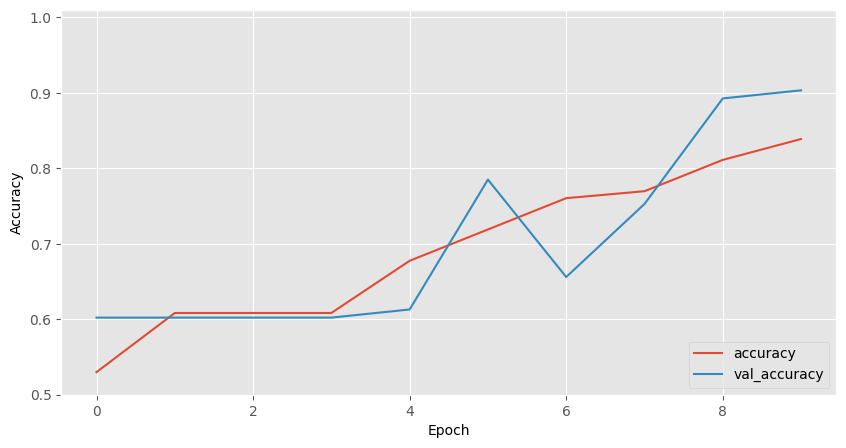

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [63]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 63ms/step - loss: 0.3203 - accuracy: 0.9032


In [64]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.3203183710575104
accuracy : 0.9032257795333862


3/3 [==============================] - 0s 60ms/step


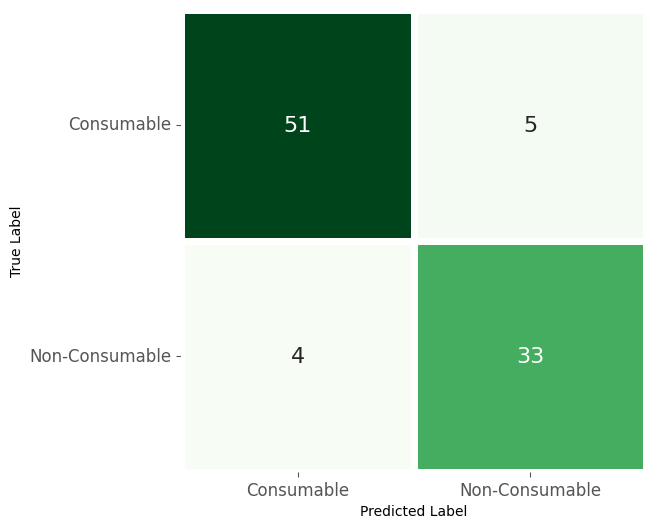

In [65]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()

In [66]:
# Case 2: Prediction in HSV Color Space

In [67]:
# Model initializing
model = models.Sequential()

In [68]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [25]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

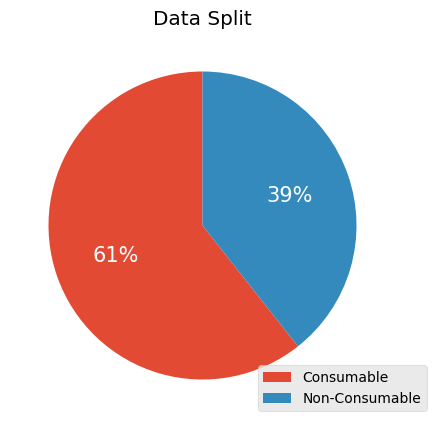

In [69]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [70]:
width = 100
height = 100

In [71]:
# Converting BGR Images to HSV Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 29.95703


In [72]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(310, 100, 100, 3)

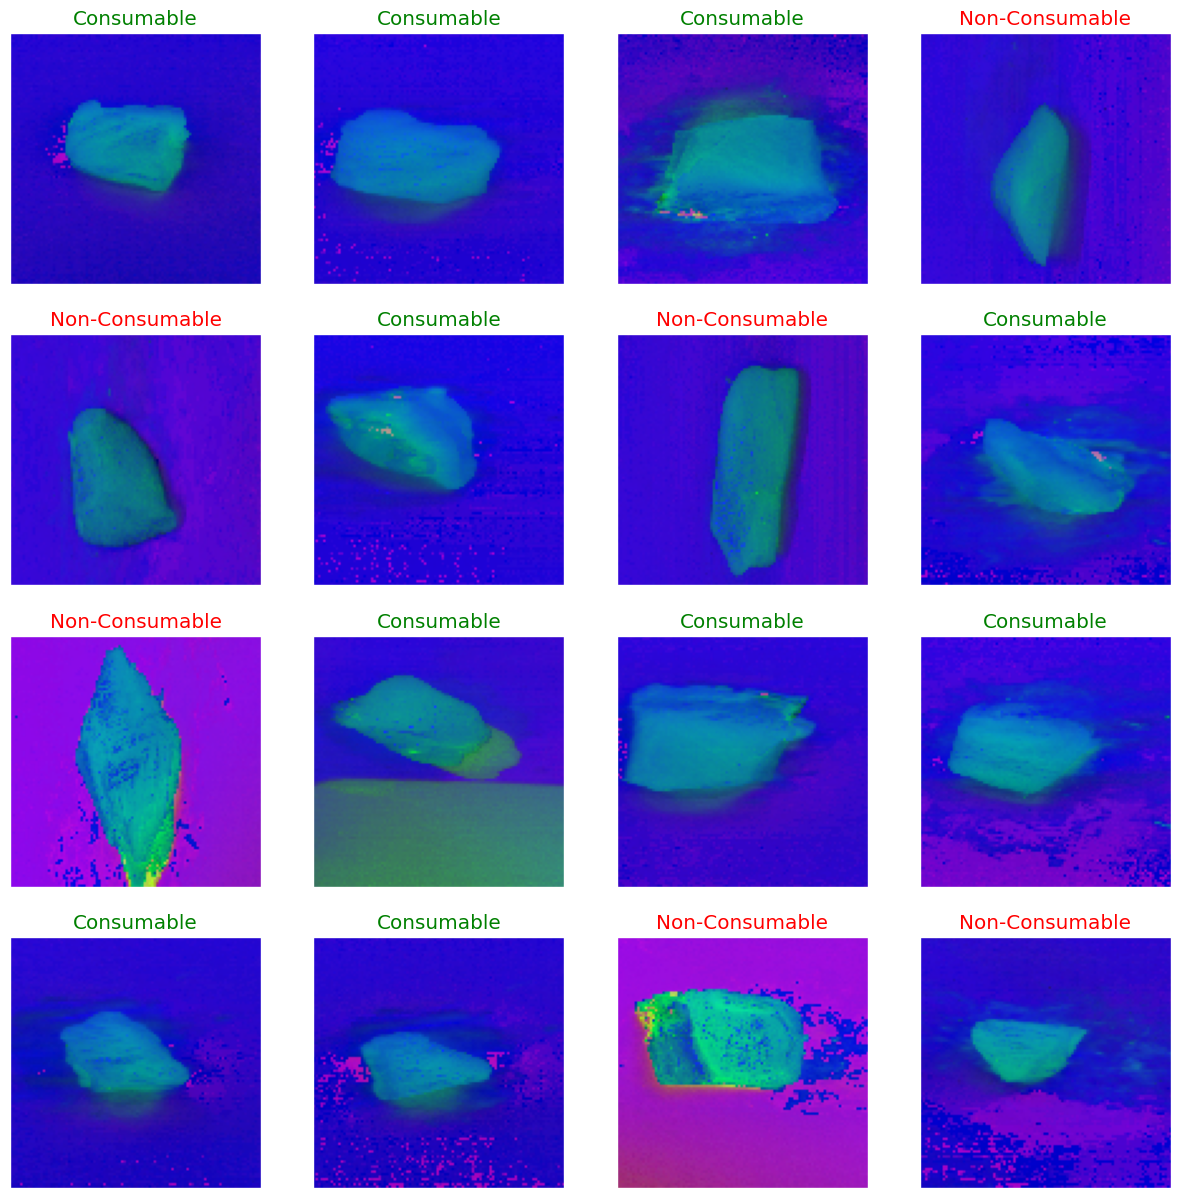

In [73]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [74]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [75]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 360.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [76]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [77]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 [==============================] - 3s 296ms/step - loss: 0.7296 - accuracy: 0.4470 - val_loss: 0.6772 - val_accuracy: 0.7849
Epoch 2/10
7/7 [==============================] - 2s 262ms/step - loss: 0.6271 - accuracy: 0.7281 - val_loss: 0.4673 - val_accuracy: 0.7634
Epoch 3/10
7/7 [==============================] - 2s 255ms/step - loss: 0.4976 - accuracy: 0.7373 - val_loss: 0.3991 - val_accuracy: 0.7957
Epoch 4/10
7/7 [==============================] - 2s 264ms/step - loss: 0.4893 - accuracy: 0.7650 - val_loss: 0.3862 - val_accuracy: 0.8280
Epoch 5/10
7/7 [==============================] - 2s 251ms/step - loss: 0.4636 - accuracy: 0.7650 - val_loss: 0.3617 - val_accuracy: 0.8065
Epoch 6/10
7/7 [==============================] - 2s 257ms/step - loss: 0.3674 - accuracy: 0.8249 - val_loss: 0.3196 - val_accuracy: 0.8925
Epoch 7/10
7/7 [==============================] - 2s 264ms/step - loss: 0.3035 - accuracy: 0.8848 - val_loss: 0.3450 - val_accuracy: 0.8172
Epoch 8/10
7/7 [====

3/3 - 0s - loss: 0.2626 - accuracy: 0.9247 - 217ms/epoch - 72ms/step


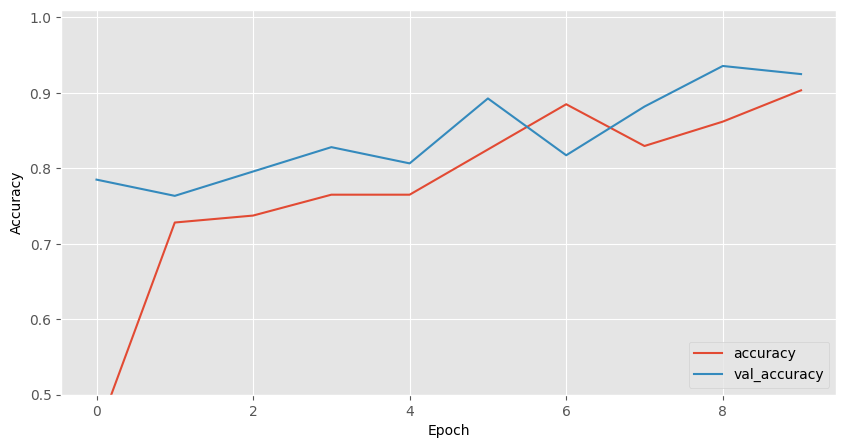

In [78]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [79]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 60ms/step - loss: 0.2626 - accuracy: 0.9247


In [80]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.2626471221446991
accuracy : 0.9247311949729919


3/3 [==============================] - 0s 64ms/step


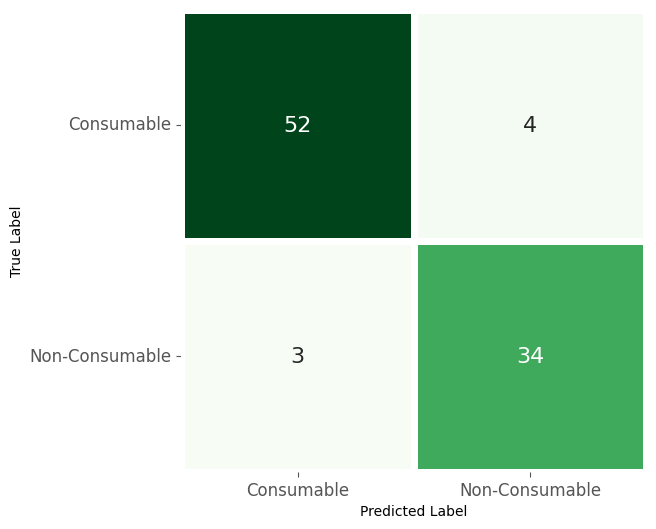

In [81]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()